# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
dataset = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'

### Step 3. Assign it to a variable apple

In [3]:
apple = pd.read_csv(dataset)
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [5]:
apple.Date = pd.to_datetime(apple.Date)

### Step 6.  Set the date as the index

In [6]:
apple.set_index('Date', drop=True, inplace=True)

In [7]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [8]:
#Gera um array booleano com data duplicada
#Verifica se existe de fato alguma

True in pd.DatetimeIndex.duplicated(apple.index) 

False

In [11]:
apple.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [12]:
apple.sort_index(inplace=True)

### Step 9. Get the last business day of each month

In [13]:
start = str(apple.index[0])
end = str(apple.index[len(apple)-1])

idx = pd.date_range(start=start, end=end, freq='BM')

In [14]:
apple.query('index in @idx').head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44


In [15]:
apple_month = apple.resample('BM').mean()
apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


### Step 10.  What is the difference in days between the first day and the oldest

In [16]:
delta = apple.index[len(apple)-1] - apple.index[0]
delta.days

12261

In [17]:
delta2 = apple.index.max() - apple.index.min()
delta2.days

12261

### Step 11.  How many months in the data we have?

In [18]:
#Agrupar o dataframe por anos e os meses de cada ano
months = apple.groupby(by=[apple.index.year, apple.index.month])

In [19]:
#Contar a qtd de linhas
months.sum().shape[0]

404

In [ ]:
monthsx = apple.resample('BM').mean()
monthsx.shap

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

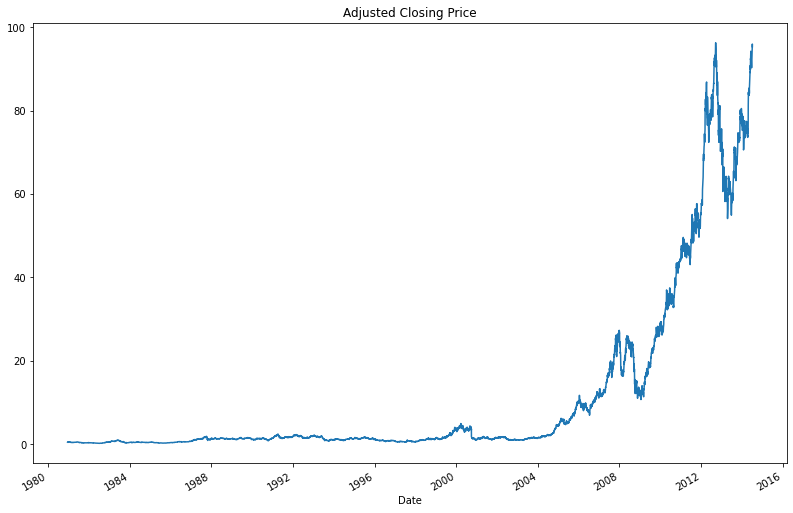

In [195]:
fig = apple['Adj Close'].plot(figsize=(13.5,9))

plt.title('Adjusted Closing Price')
plt.show()

### BONUS: Create your own question and answer it.

#### Ver a relação entre Close Price e Volume de Transação

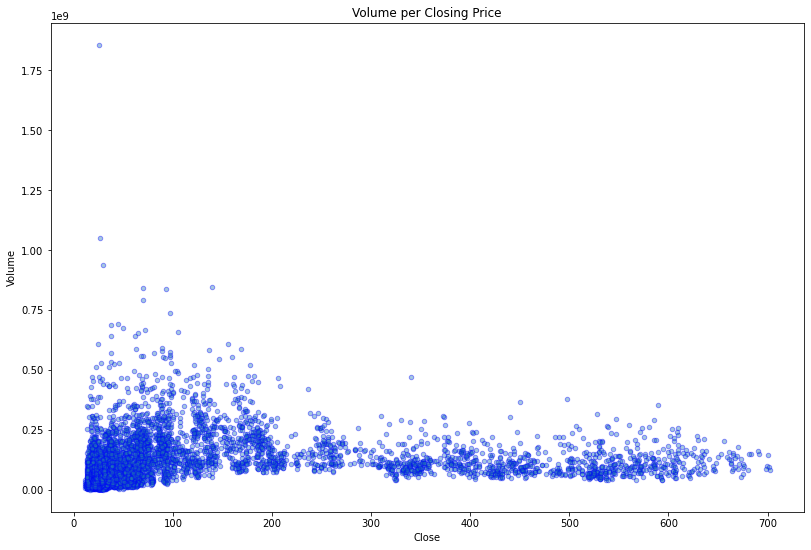

In [196]:
apple.plot(x='Close',y='Volume',kind='scatter', figsize=(13.5,9), edgecolor='b',alpha=0.4)

plt.title('Volume per Closing Price')
plt.show()

In [197]:
apple['delta_price'] = apple['Close'] - apple['Open']

decade = apple.resample('10AS').mean()

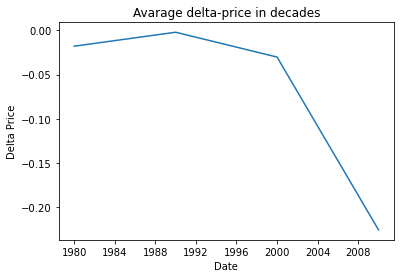

In [198]:
sns.lineplot(x=decade.index, y='delta_price',data=decade)

plt.title('Avarage delta-price in decades')
plt.ylabel('Delta Price')
plt.show()